# Analisis de datos de Tweets COVID-19 
- Vamos a realizar un analisis de los datos con el fin de ver cual es el promedio de palabras utilizadas cuando se tweetea sobre COVID-19.
- Utilizaremos la localizacion para ver desde que lugar se habla mas de COVID-19.
- Utilizaremos la fecha para ver en que momento se habla mas de COVID-19.

In [134]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [135]:
#  Modificamos los parámetros de los gráficos en matplotlib
from matplotlib.pyplot import rcParams

rcParams['figure.figsize'] = 12, 6 # el primer dígito es el ancho y el segundo el alto
rcParams["font.weight"] = "bold"
rcParams["font.size"] = 10
rcParams["axes.labelweight"] = "bold"

In [136]:
df = pd.read_csv('covid19_tweets.csv')
df

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
179103,AJIMATI AbdulRahman O.,"Ilorin, Nigeria",Animal Scientist|| Muslim|| Real Madrid/Chelsea,2013-12-30 18:59:19,412,1609,1062,False,2020-08-29 19:44:21,Thanks @IamOhmai for nominating me for the @WH...,['WearAMask'],Twitter for Android,False
179104,Jason,Ontario,When your cat has more baking soda than Ninja ...,2011-12-21 04:41:30,150,182,7295,False,2020-08-29 19:44:16,2020! The year of insanity! Lol! #COVID19 http...,['COVID19'],Twitter for Android,False
179105,BEEHEMOTH ⏳,🇨🇦 Canada,⚒️ The Architects of Free Trade ⚒️ Really Did ...,2016-07-13 17:21:59,1623,2160,98000,False,2020-08-29 19:44:15,@CTVNews A powerful painting by Juan Lucena. I...,NaN,Twitter Web App,False
179106,Gary DelPonte,New York City,"Global UX UI Visual Designer. StoryTeller, Mus...",2009-10-27 17:43:13,1338,1111,0,False,2020-08-29 19:44:14,"More than 1,200 students test positive for #CO...",['COVID19'],Twitter for iPhone,False


## Las variables que componen este DataSet son:
   - **user_name** : Nombre de usuario de Twitter
   - **user_location** : Ubicación del usuario de Twitter
   - **user_description** : Descripción del usuario de Twitter
   - **user_created** : Fecha de creación de la cuenta de Twitter
   - **user_followers** : Número de seguidores del usuario de Twitter
   - **user_friends** : Número de amigos del usuario de Twitter
   - **user_favourites** : Número de favoritos del usuario de Twitter
   - **user_verified** : Verificación del usuario de Twitter
   - **date** : Fecha del tweet
   - **text** : Texto del tweet
   - **hashtags** : Hashtags del tweet
   - **source** : Fuente del tweet
   - **is_retweet** : Retweet

In [137]:
#  Comprobamos si hay valores nulos en el dataset
df.isna().sum()

user_name               0
user_location       36771
user_description    10286
user_created            0
user_followers          0
user_friends            0
user_favourites         0
user_verified           0
date                    0
text                    0
hashtags            51334
source                 77
is_retweet              0
dtype: int64

## Primer objetivo:
* Ver cual es el promedio de palabras utilizadas cuando se tweetea sobre **COVID-19**, cuales son las **palabras** mas utilizadas y los **hashtags** más utilizados.

### Primero vemos cuales son los hashtags mas utilizados

In [138]:
columnas_drop = ['user_name', 
                 'user_location', 
                 'user_description', 
                 'user_created', 
                 'user_followers', 
                 'user_friends', 
                 'user_favourites', 
                 'user_verified', 
                 'date',  
                 'source', 
                 'is_retweet']

In [139]:
# Nos deshacemos de las columnas que en este caso no nos aportan información relevante
df_filt1 = df.drop(columnas_drop, axis=1)
df_filt1

,text,hashtags
0,If I smelled the scent of hand sanitizers toda...,NaN
1,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN
2,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19']
3,@brookbanktv The one gift #COVID19 has give me...,['COVID19']
4,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']"
...,...,...
179103,Thanks @IamOhmai for nominating me for the @WH...,['WearAMask']
179104,2020! The year of insanity! Lol! #COVID19 http...,['COVID19']
179105,@CTVNews A powerful painting by Juan Lucena. I...,NaN
179106,"More than 1,200 students test positive for #CO...",['COVID19']


In [140]:
#  Comprobamos si hay valores nulos en el dataset 
df_filt1.isna().sum()

text            0
hashtags    51334
dtype: int64

In [141]:
#  Vemos la longitud del dataset 
print(df_filt1.shape[0])
#  Calculamos la longitud del una vez quitemos los valores nulos de la columna 'hashtags'
print(df.shape[0] - df_filt1.isna().sum()['hashtags'])

179108
127774


In [142]:
#  Borramos las filas que contengan valores nulos
df_filt2 = df_filt1.dropna()
df_filt2.shape[0] #  Vemos que la longitud del dataset es la que habíamos calculado antes

127774

In [143]:
#  Reseteamos el índice del dataset
df_filt2.reset_index(drop=True, inplace=True)
df_filt2

,text,hashtags
0,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19']
1,@brookbanktv The one gift #COVID19 has give me...,['COVID19']
2,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']"
3,#coronavirus #covid19 deaths continue to rise....,"['coronavirus', 'covid19']"
4,How #COVID19 Will Change Work in General (and ...,"['COVID19', 'Recruiting']"
...,...,...
127769,Wallkill school nurse adds COVID-19 monitoring...,"['nurses', 'COVID19', 'coronavirus', 'schools']"
127770,"we have reached 25mil cases of #covid19, world...",['covid19']
127771,Thanks @IamOhmai for nominating me for the @WH...,['WearAMask']
127772,2020! The year of insanity! Lol! #COVID19 http...,['COVID19']


In [144]:
def separate_hashtags(df):
    # Crear una nueva columna "hashtag" separando los hashtags
    df.loc[:, 'hashtag'] = df['hashtags'].str.split(',')
    
    # Expandir las filas si hay más de un hashtag
    df = df.explode('hashtag')
    
    # Eliminar espacios en blanco alrededor de los hashtags
    df.loc[:, 'hashtag'] = df['hashtag'].str.strip()
    
    return df

In [145]:
df_filt2_separated = separate_hashtags(df_filt2) 
df_filt2_separated.reset_index(drop=True, inplace=True) #  Reseteamos el índice del dataset
df_filt2_separated.drop('hashtags', axis=1, inplace=True) #  Borramos la columna 'hashtags'
df_filt2_separated

C:\Users\enriq\AppData\Local\Temp\ipykernel_21700\2784178043.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'hashtag'] = df['hashtags'].str.split(',')


,text,hashtag
0,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19']
1,@brookbanktv The one gift #COVID19 has give me...,['COVID19']
2,25 July : Media Bulletin on Novel #CoronaVirus...,['CoronaVirusUpdates'
3,25 July : Media Bulletin on Novel #CoronaVirus...,'COVID19']
4,#coronavirus #covid19 deaths continue to rise....,['coronavirus'
...,...,...
265989,Wallkill school nurse adds COVID-19 monitoring...,'schools']
265990,"we have reached 25mil cases of #covid19, world...",['covid19']
265991,Thanks @IamOhmai for nominating me for the @WH...,['WearAMask']
265992,2020! The year of insanity! Lol! #COVID19 http...,['COVID19']


In [146]:
#  Ahora vemos cuales son los 10 hashtags más utilizados en los tweets
df_filt2_separated['hashtag'].value_counts().head(10)

hashtag
['COVID19']       37792
'COVID19']        17544
['COVID19'        14892
'COVID19'         10213
['Covid19']        4834
['covid19']        3124
['coronavirus'     2701
'Covid19']         2297
'covid19']         2263
['Covid19'         2101
Name: count, dtype: int64

In [147]:
import re

def limpiar_hashtags(hashtags):
    #  Expresión regular para encontrar hashtags
    regex = r"(\w+)"
    
    hashtags_limpios = []
    for hashtag in hashtags:
        #  Buscar coincidencias en el hashtag 
        coincidencias = re.findall(regex, hashtag)
        
        #  Unir en un solo hashtag
        cleaned_hashtag = ''.join(coincidencias)
        
        hashtags_limpios.append(cleaned_hashtag)
    
    return hashtags_limpios

In [148]:
# Aplicamos la limpieza de hashtags al DataFrame
df_filt2_separated['hashtag_limpio'] = limpiar_hashtags(df_filt2_separated['hashtag'])
df_filt2_separated

,text,hashtag,hashtag_limpio
0,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],COVID19
1,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],COVID19
2,25 July : Media Bulletin on Novel #CoronaVirus...,['CoronaVirusUpdates',CoronaVirusUpdates
3,25 July : Media Bulletin on Novel #CoronaVirus...,'COVID19'],COVID19
4,#coronavirus #covid19 deaths continue to rise....,['coronavirus',coronavirus
...,...,...,...
265989,Wallkill school nurse adds COVID-19 monitoring...,'schools'],schools
265990,"we have reached 25mil cases of #covid19, world...",['covid19'],covid19
265991,Thanks @IamOhmai for nominating me for the @WH...,['WearAMask'],WearAMask
265992,2020! The year of insanity! Lol! #COVID19 http...,['COVID19'],COVID19


In [149]:
# Contar los hashtags limpios
top_10_hashtags = df_filt2_separated['hashtag_limpio'].value_counts().head(10)
top_10_hashtags

hashtag_limpio
COVID19                80441
Covid19                10524
covid19                 9211
coronavirus             7098
Coronavirus             2535
pandemic                1275
India                   1090
CoronavirusPandemic      863
Trump                    848
lockdown                 806
Name: count, dtype: int64

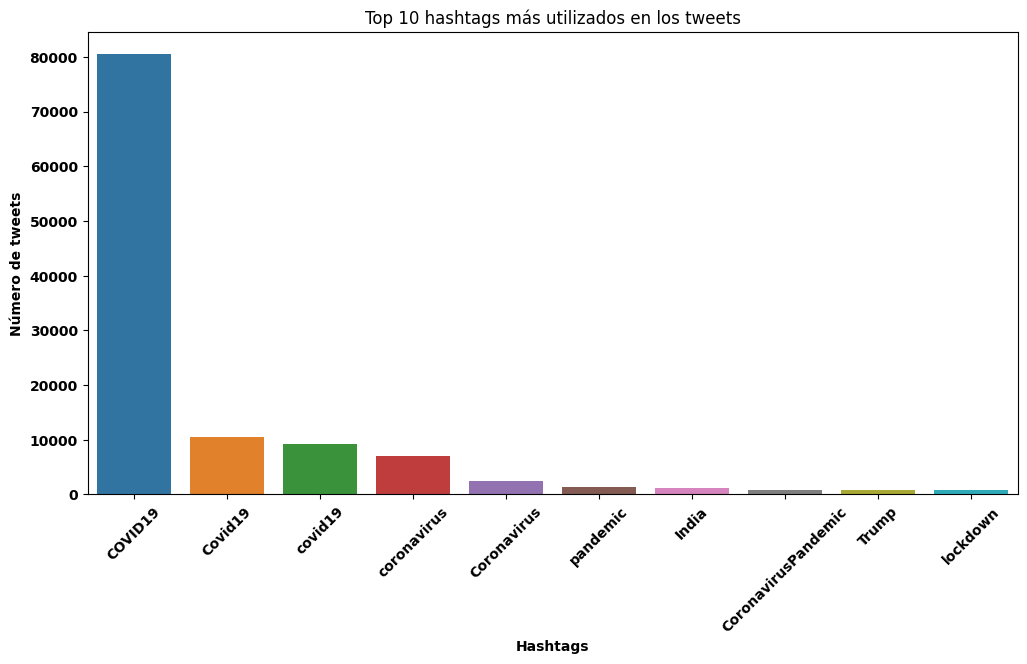

In [150]:
#  Ahora si podemos hacer el gráfico de barras de los 10 hashtags más utilizados en los tweets 
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_hashtags.index, y=top_10_hashtags.values)
plt.title('Top 10 hashtags más utilizados en los tweets')
plt.xlabel('Hashtags')
plt.ylabel('Número de tweets')
plt.xticks(rotation=45)
plt.show()

### Ahora vamos a buscar las palabras mas utilizadas en los tweets sobre **COVID-19**.

In [151]:
#  Ahora buscamos las palabras mas utilizadas en los tweets 
from collections import Counter

def get_top_n_words(corpus, n=None):
    #  Lista de todas las palabras en el corpus
    all_words = []
    for tweet in corpus:
        all_words.extend(tweet.split())
    
    #  Contar las palabras y ordenarlas de mayor a menor
    counter = Counter(all_words)
    counter = sorted(counter.items(), key=lambda x: x[1], reverse=True)
    
    #  Devolver las n palabras más utilizadas
    if n is not None:
        counter = counter[:n]
    
    return counter

In [152]:
def filtrar_palabras(dataframe):
    stopwords = ['the','to','of','in','a','and','is','for','on','are','with','this','has','have','new','we','that','you','from','at','as','it','by','-',
                 'i','be','was','will','not','your','who','all','an','my','us','our','about','&amp;','can','up','but','more','they','their','he','she','how']
    # Aplicar el filtro a la columna 'text'
    df_filt2.loc[:,'text'] = df_filt2['text'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stopwords]))
    
    return dataframe


In [153]:
df_filt3 = filtrar_palabras(df_filt2)
top_10_palabras = get_top_n_words(df_filt2['text'], n=10)
top_10_palabras

[('#COVID19', 68885),
 ('cases', 11484),
 ('#Covid19', 8899),
 ('#covid19', 8038),
 ('#coronavirus', 6289),
 ('people', 4537),
 ('deaths', 4182),
 ('during', 3605),
 ('been', 3502),
 ('positive', 3374)]

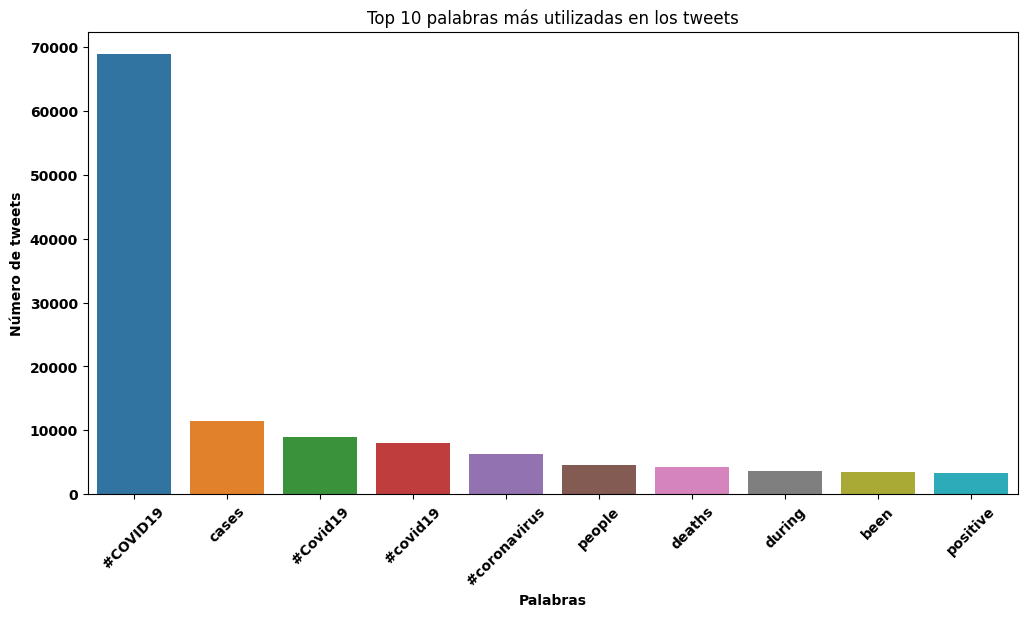

In [154]:
#  Gráfico de barras de las 10 palabras más utilizadas en los tweets
plt.figure(figsize=(12, 6))
sns.barplot(x=[x[0] for x in top_10_palabras], y=[x[1] for x in top_10_palabras])
plt.title('Top 10 palabras más utilizadas en los tweets')
plt.xlabel('Palabras')
plt.ylabel('Número de tweets')
plt.xticks(rotation=45)
plt.show()

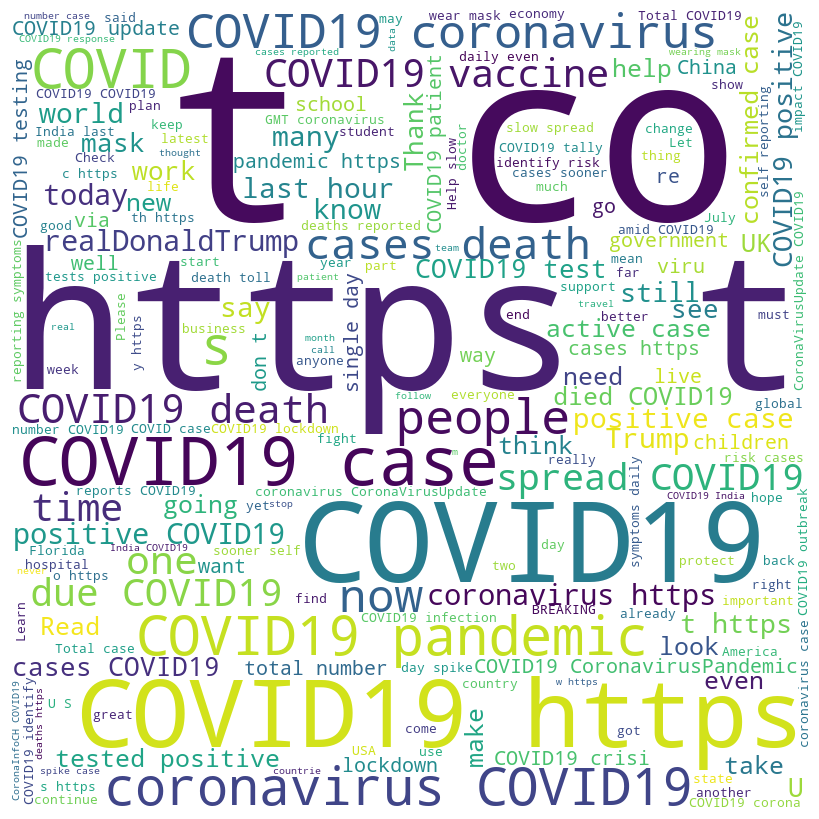

In [155]:
#  Heatmap de las palabras más utilizadas en los tweets
from wordcloud import WordCloud

#  Creamos una lista con las palabras más utilizadas en los tweets
top_10_palabras = [x[0] for x in top_10_palabras]

#  Creamos una lista con los tweets
tweets = df_filt2['text'].tolist()

#  Creamos una lista con los tweets que contengan las palabras más utilizadas
tweets_top_10_palabras = []
for tweet in tweets:
    for palabra in top_10_palabras:
        if palabra in tweet:
            tweets_top_10_palabras.append(tweet)
            break

#  Creamos un string con todos los tweets que contengan las palabras más utilizadas
tweets_top_10_palabras = ' '.join(tweets_top_10_palabras)

#  Creamos el WordCloud
wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(tweets_top_10_palabras)

#  Mostramos el WordCloud
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

## Segundo objetivo:
Ahora comenzaremos a analizar los tweets para ver cual es el sitio mas frecuente desde el cual se habla de **COVID-19**.

In [156]:
columnas_drop2 = ['user_name', 
                 'user_description', 
                 'user_created', 
                 'user_followers', 
                 'user_friends', 
                 'user_favourites', 
                 'user_verified', 
                 'text',
                 'hashtags',
                 'date',  
                 'source', 
                 'is_retweet']

In [157]:
# Limpiamos el dataset para quedarnos solo con las columnas que nos interesan, en este caso solo nos quedamos con la columna 'user_location'
df_filt4 = df.drop(columnas_drop2, axis=1)
df_filt4

,user_location
0,astroworld
1,"New York, NY"
2,"Pewee Valley, KY"
3,Stuck in the Middle
4,Jammu and Kashmir
...,...
179103,"Ilorin, Nigeria"
179104,Ontario
179105,🇨🇦 Canada
179106,New York City


In [158]:
#  Comprobamos si hay valores nulos en el dataset
df_filt4.isna().sum()

user_location    36771
dtype: int64

In [159]:
#  Eliminamos los valores nulos del dataset
df_filt5 = df_filt4.dropna(inplace=True)
df_filt5

In [160]:
#  Separamos el pais y la ciudad en dos columnas diferentes 
def get_country(location):
    if ',' in location:
        return location.split(', ')[-1]
    else:
        return None


def get_city(location):
    if ',' in location:
        return location.split(', ')[0]
    else:
        return location

In [161]:
df_filt4['country'] = df_filt4['user_location'].apply(get_country)
df_filt4['city'] = df_filt4['user_location'].apply(get_city)

#  Eliminamos la columna 'user_location' ya que no nos hace falta
df_filt4.drop('user_location', axis=1, inplace=True)
df_filt4

,country,city
0,None,astroworld
1,NY,New York
2,KY,Pewee Valley
3,None,Stuck in the Middle
4,None,Jammu and Kashmir
...,...,...
179103,Nigeria,Ilorin
179104,None,Ontario
179105,None,🇨🇦 Canada
179106,None,New York City


In [162]:
#  Cambiamos los valores que sean None por NaN de la columna 'country'
df_filt4['country'].replace('None', np.NAN, inplace=True)
df_filt4.isna().sum()


country    68346
city           0
dtype: int64

In [163]:
#  Eliminamos las filas que tengan valores nulos del dataset
df_filt5 = df_filt4.dropna().reset_index(drop=True)
df_filt5.isna().sum()

country    0
city       0
dtype: int64

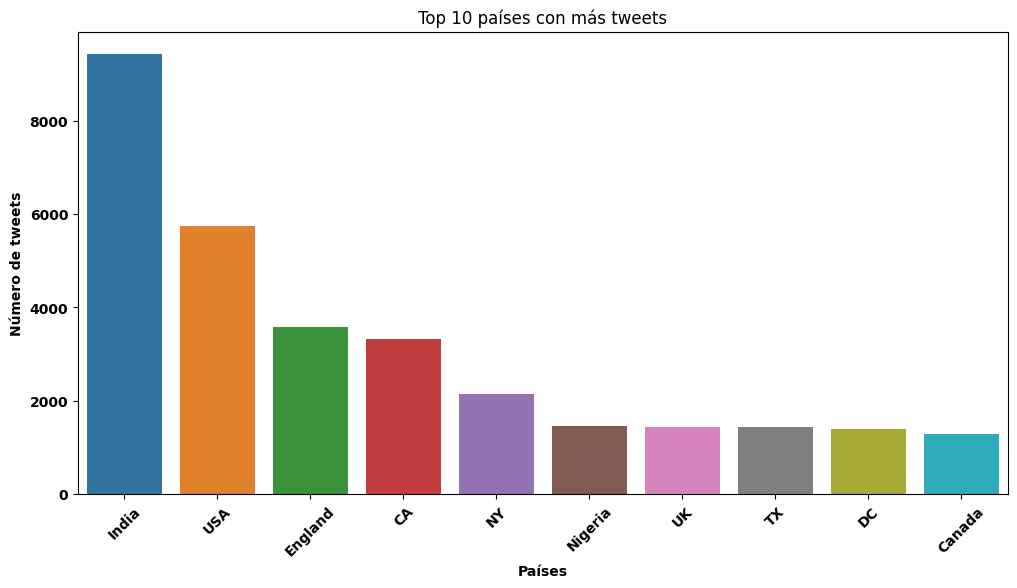

In [164]:
#  Ahora si podemos hacer el gráfico de barras de los 10 países con más tweets
top_10_paises = df_filt5['country'].value_counts().head(10)
top_10_paises

plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_paises.index, y=top_10_paises.values)
plt.title('Top 10 países con más tweets')
plt.xlabel('Países')
plt.ylabel('Número de tweets')
plt.xticks(rotation=45)
plt.show()

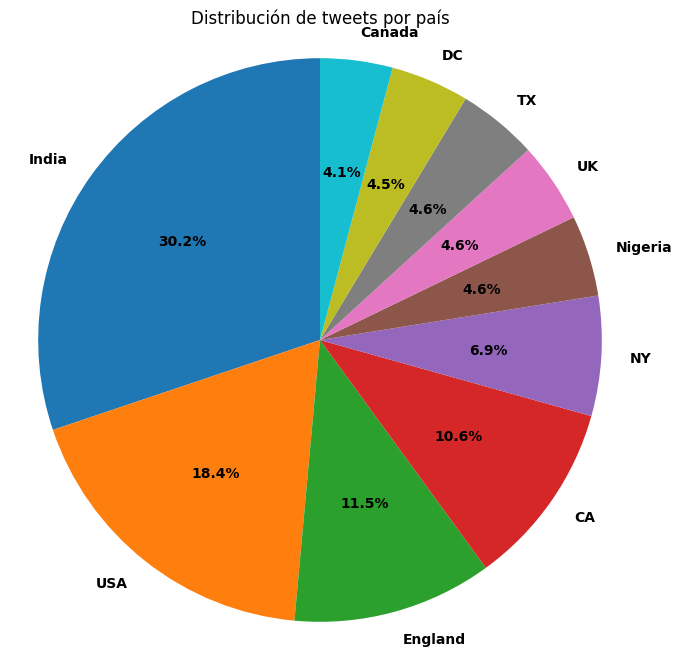

In [165]:
#  Hacemos un grafico de pastel para ver la distribución de los tweets por país
plt.figure(figsize=(8, 8))
df_pie = df_filt5['country'].value_counts().head(10)
plt.pie(df_pie, labels=df_pie.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribución de tweets por país')
plt.axis('equal')
plt.show()

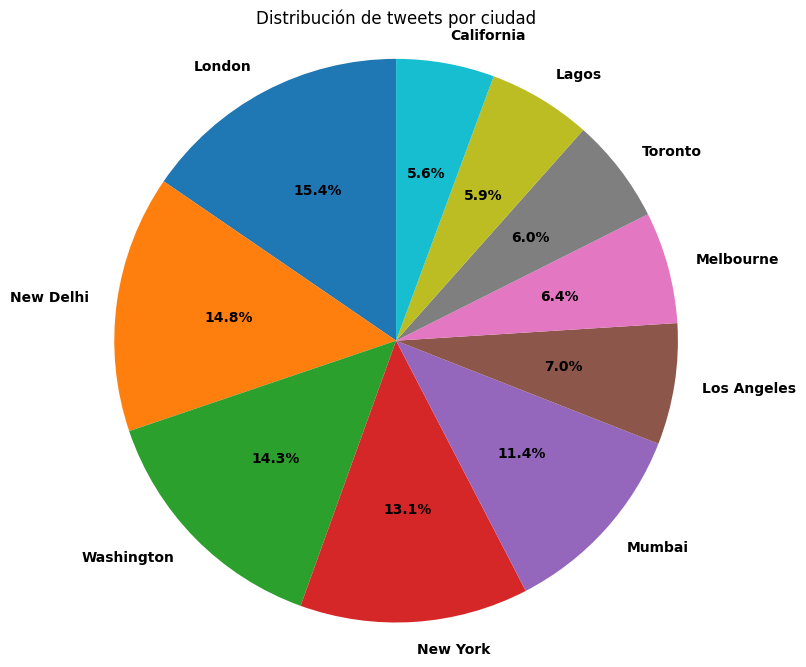

In [166]:
#  Hacemos un grafico de pastel para ver la distribución de los tweets por ciudad
plt.figure(figsize=(8, 8))
df_pie = df_filt5['city'].value_counts().head(10)
plt.pie(df_pie, labels=df_pie.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribución de tweets por ciudad')
plt.axis('equal')
plt.show()


### Tercer objetivo:
Utilizaremos la fecha para ver en que momento se habla mas de COVID-19.

In [167]:
columnas_drop3 = ['user_name', 
                'user_location', 
                'user_description', 
                'user_created', 
                'user_followers', 
                'user_friends', 
                'user_favourites', 
                'user_verified', 
                'text',
                'hashtags',
                'source', 
                'is_retweet']

In [168]:
# Nos deshacemos de las columnas que en este caso no nos aportan información relevante
df_filt6 = df.drop(columnas_drop3, axis=1)
df_filt6

,date
0,2020-07-25 12:27:21
1,2020-07-25 12:27:17
2,2020-07-25 12:27:14
3,2020-07-25 12:27:10
4,2020-07-25 12:27:08
...,...
179103,2020-08-29 19:44:21
179104,2020-08-29 19:44:16
179105,2020-08-29 19:44:15
179106,2020-08-29 19:44:14


In [169]:
#  Separamos en dos columnas la hora y el día del tweet
df_filt6['hour'] = df_filt6['date'].apply(lambda x: x.split(' ')[-1])
df_filt6['day'] = df_filt6['date'].apply(lambda x: x.split(' ')[0])
df_filt6.drop('date', axis=1, inplace=True)  #  Borramos la columna 'date' ya que no nos hace falta
df_filt6

,hour,day
0,12:27:21,2020-07-25
1,12:27:17,2020-07-25
2,12:27:14,2020-07-25
3,12:27:10,2020-07-25
4,12:27:08,2020-07-25
...,...,...
179103,19:44:21,2020-08-29
179104,19:44:16,2020-08-29
179105,19:44:15,2020-08-29
179106,19:44:14,2020-08-29


In [170]:
#  Para poder hacer el gráfico de barras de los tweets por hora, tenemos que convertir la columna 'hour' a tipo datetime
df_filt6['hour'] = pd.to_datetime(df_filt6['hour'], format='%H:%M:%S').dt.hour
#  Creamos una columna con el día de la semana, el dia, el mes y el año
df_filt6['day_of_week'] = pd.to_datetime(df_filt6['day']).dt.day_name()
df_filt6['month'] = pd.to_datetime(df_filt6['day']).dt.month
df_filt6['year'] = pd.to_datetime(df_filt6['day']).dt.year
df_filt6['day'] = pd.to_datetime(df_filt6['day']).dt.day
df_filt6

,hour,day,day_of_week,month,year
0,12,25,Saturday,7,2020
1,12,25,Saturday,7,2020
2,12,25,Saturday,7,2020
3,12,25,Saturday,7,2020
4,12,25,Saturday,7,2020
...,...,...,...,...,...
179103,19,29,Saturday,8,2020
179104,19,29,Saturday,8,2020
179105,19,29,Saturday,8,2020
179106,19,29,Saturday,8,2020


In [175]:
#  Vemos si hay valores nulos en el dataset
df_filt6.isna().sum()

hour           0
day            0
day_of_week    0
month          0
year           0
dtype: int64

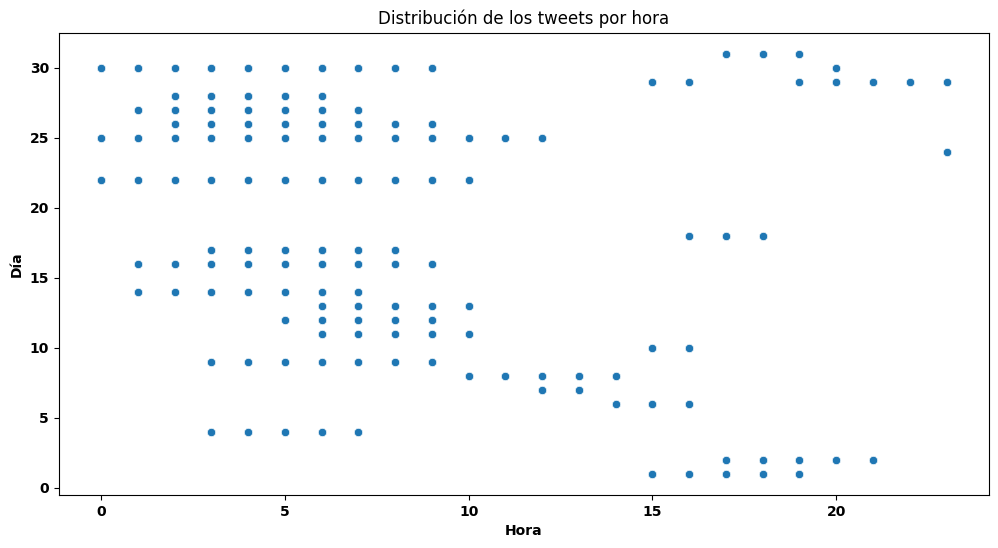

In [177]:
#  Grafico de dispersión de los tweets por hora
plt.figure(figsize=(12, 6))
sns.scatterplot(x=df_filt6['hour'], y=df_filt6['day'])
plt.title('Distribución de los tweets por hora')
plt.xlabel('Hora')
plt.ylabel('Día')
plt.show()

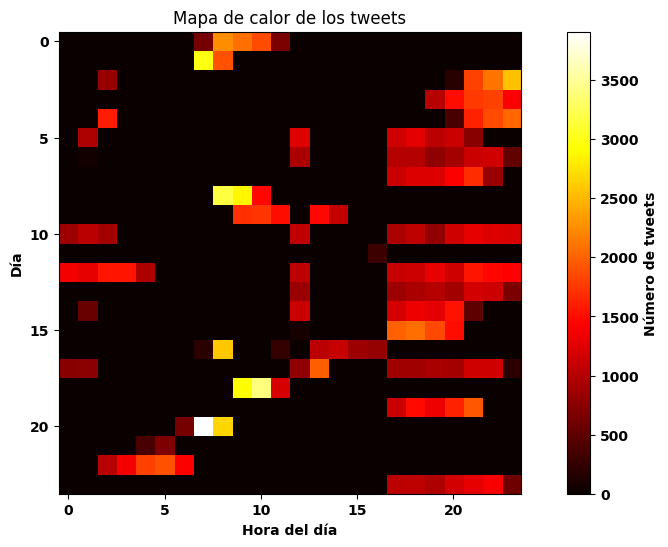

In [180]:
# Crear una matriz de frecuencias para los días y horas y hacer un mapa de calor 
frecuencias = df_filt6.pivot_table(index='day', columns='hour', aggfunc='size', fill_value=0)

plt.imshow(frecuencias, cmap='hot', interpolation='nearest')
plt.colorbar(label='Número de tweets')
plt.xlabel('Hora del día')
plt.ylabel('Día')
plt.title('Mapa de calor de los tweets')
plt.show()

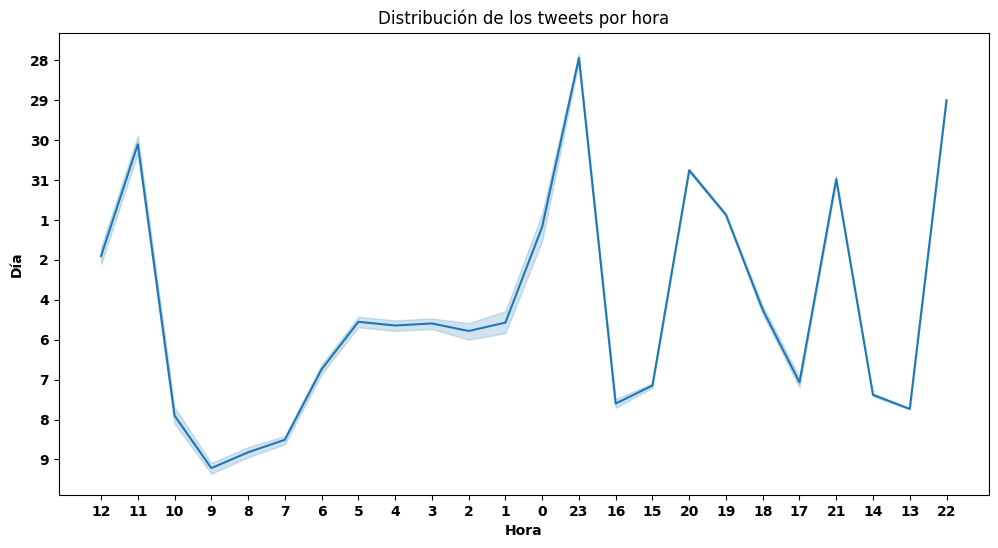

In [181]:
# Crear el gráfico de líneas de los tweets por hora 
plt.figure(figsize=(12, 6))
sns.lineplot(x=df_filt6['hour'], y=df_filt6['day'])
plt.title('Distribución de los tweets por hora')
plt.xlabel('Hora')
plt.ylabel('Día')
plt.show()

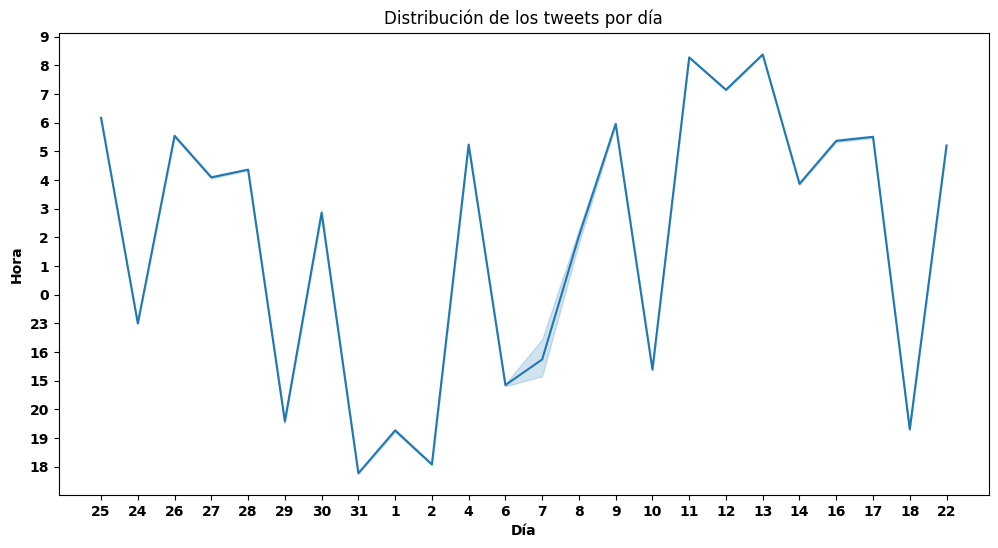

In [182]:
# Crear el gráfico de líneas de los tweets por día
plt.figure(figsize=(12, 6))
sns.lineplot(x=df_filt6['day'], y=df_filt6['hour'])
plt.title('Distribución de los tweets por día')
plt.xlabel('Día')
plt.ylabel('Hora')
plt.show()

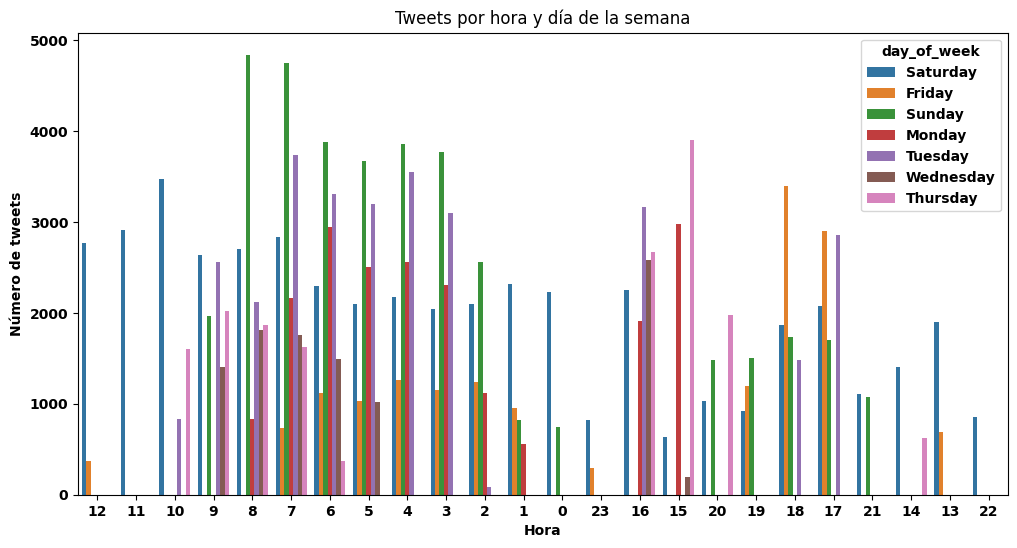

In [183]:
#  Hacemos un gráfico de barras sobre barras para ver los tweets por hora y por día de la semana
plt.figure(figsize=(12, 6))
sns.countplot(x='hour', hue='day_of_week', data=df_filt6)
plt.title('Tweets por hora y día de la semana')
plt.xlabel('Hora')
plt.ylabel('Número de tweets')
plt.show()